In [1]:
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import pandas as pd
import tensorflow as tf
import matplotlib
from scipy.stats import pearsonr
#그래프 한글 사용
print ('버전: ', matplotlib.__version__)
print ('설치위치: ', matplotlib.__file__)
print ('설정: ', matplotlib.get_configdir())
print ('캐시: ', matplotlib.get_cachedir())
%matplotlib inline
plt.rcParams["axes.grid"] = True
plt.rcParams["figure.figsize"] = (14,4)
plt.rcParams["font.family"] = 'nanummyeongjo'
plt.rcParams['axes.unicode_minus'] = False

버전:  2.2.2
설치위치:  C:\Users\sprin\Anaconda3\lib\site-packages\matplotlib\__init__.py
설정:  C:\Users\sprin\.matplotlib
캐시:  C:\Users\sprin\.matplotlib


In [2]:
#data_t,  data_temp
import os
data_=pd.read_csv("C:/c언어 과제/test/2019 통계빅데이터/data/data2/제조업생산_증감률.csv",engine="python")
col_=data_.loc[0]
d_p=data_.columns[0]
a_=0
for i in range(0,113):
    d_t=data_.columns[a_+1:a_+3]
    d_y=data_.columns[a_+1][:8]
    d_y=d_y.replace(".","")
    d_y=d_y.replace(" ","")
    if i==0:
        col_1=data_.loc[0]["2010. 01"]
        col_2=data_.loc[0]["2010. 01.1"]
        data_t=pd.DataFrame({"place":data_[d_p], "date":int(d_y), col_1:data_[d_t[0]], col_2:data_[d_t[1]]})
    else:
        d_t=pd.DataFrame({"place":data_[d_p], "date":int(d_y), col_1:data_[d_t[0]], col_2:data_[d_t[1]]})
        data_t=data_t.append(d_t)
    a_+=2
#data_t=d_t.sort("date")
#data_t=data_t.drop([0,1])

#온도뎅;터
path_dir="data/data2/"
file_list=os.listdir(path_dir)
file_list.sort()

#자료구조
place_arr2={108:"서울특별시",159:"부산광역시",143:"대구광역시",112:"인천광역시",156:"광주광역시",
           133:"대전광역시",152:"울산광역시",119:"경기도",114:"강원도",131:"충청북도",
           232:"충청남도",146:"전라북도",168:"전라남도",138:"경상북도",155:"경상남도",
           184:"제주특별자치도"}
data_temp=[]
data_temp_korea={}

for file in file_list:
    if file.find("201") is not -1:
        data_temp.append(file)
print(place_arr2.values())

for file_ in data_temp: 
    data_=pd.read_csv(path_dir+file_, engine="python")
    data_.columns=['place', 'date', '평균기온(C)', '최고기온(C)', '최저기온(C)', '평균상대습도(%)',
       '월합강수량(00~24h만)(mm)', '평균풍속(m/s)', '평균운량']
    #data_["place"]=data_["place"].to_string()
    #print(data_.head())
    for i in range(len(data_)):
        #data_["place"].values[i]=place_arr2[int(data_["place"].values[i])]
        data_["date"].values[i] =data_["date"].values[i].replace("-","")
        df=pd.DataFrame({
            'place':[place_arr2[int(data_["place"].values[i])]],
            'date':[data_["date"][i]], '평균기온(C)':[data_['평균기온(C)'][i]],
            '최고기온(C)':[data_['최고기온(C)'][i]], '최저기온(C)':[data_['최저기온(C)'][i]],
            '평균상대습도(%)':[data_['평균상대습도(%)'][i]],'월합강수량(00~24h만)(mm)':[data_['월합강수량(00~24h만)(mm)'][i]],
            '평균풍속(m/s)':[data_['평균풍속(m/s)'][i]], '평균운량':[data_['평균운량'][i]]    
        }, index=[i])
        
        if place_arr2[int(data_["place"].values[i])] in data_temp_korea.keys():
            data_temp_korea[place_arr2[int(data_["place"][i])]]=data_temp_korea[place_arr2[int(data_["place"][i])]].append(df)
        else:
            data_temp_korea[place_arr2[int(data_["place"][i])]]=df

for i in data_temp_korea.keys():
    if i == "서울특별시":
        data_temp=data_temp_korea["서울특별시"]
    else:
        data_temp=data_temp.append(data_temp_korea[i])

dict_values(['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도', '경상남도', '제주특별자치도'])


In [117]:
data_fac=pd.read_csv("C:/c언어 과제/test/2019 통계빅데이터/final_data/fac/train_fac.csv",engine="python",encoding="utf-8")
data_fac=data_fac.drop("Unnamed: 0",axis=1)
data_fac=data_fac.drop(["생산지수(원지수)","생산자제품 출하지수(원지수)","생산자제품 재고지수(원지수)"],axis=1)
data_fac

KeyError: "labels ['생산지수(원지수)' '생산자제품 출하지수(원지수)' '생산자제품 재고지수(원지수)'] not contained in axis"

In [3]:
data_c=pd.read_csv("C:/c언어 과제/test/2019 통계빅데이터/final_data/fac/train.csv",engine="python",encoding="utf-8")
data_c=data_c.drop("Unnamed: 0", axis=1)
#np.unique(data_c["place"].values)
print(len(data_c))

1792


In [66]:
#각 전력 분야별 데이터 상관계수 비교시 시행 노트
compare_data=pd.read_csv("C:/c언어 과제/test/2019 통계빅데이터/final_data/fac/train_fac.csv",engine="python",
                        encoding="utf-8")
compare_data=compare_data.loc[compare_data["place"]=="강원도"]
compare_data=compare_data.drop(["Unnamed: 0","date"],axis=1)
print(pearsonr(compare_data["사용량(kWh)"], compare_data["평균판매단가(원/kWh)"]))
print(compare_data["사용량(kWh)"].head())
compare_data.corr()

(0.12166546925195815, 0.2012865747523819)
0    463950773
1    422910243
2    517990816
3    534291666
4    552798158
Name: 사용량(kWh), dtype: int64


,고객호수,사용량(kWh),전기요금(원),평균판매단가(원/kWh),평균기온(C),최고기온(C),최저기온(C),평균상대습도(%),월합강수량(00~24h만)(mm),평균풍속(m/s),평균운량
고객호수,1.000000,0.392617,0.748967,0.688418,0.016547,-0.025409,0.016629,-0.176562,-0.157762,-0.433085,-0.186134
사용량(kWh),0.392617,1.000000,0.482738,0.121665,0.197072,0.181054,0.181098,-0.098509,-0.081502,0.090604,-0.138008
전기요금(원),0.748967,0.482738,1.000000,0.925381,-0.026001,-0.103273,0.005712,0.090849,-0.071885,-0.299046,-0.090021
평균판매단가(원/kWh),0.688418,0.121665,0.925381,1.000000,-0.119154,-0.199073,-0.075912,0.130509,-0.052436,-0.359155,-0.040340
평균기온(C),0.016547,0.197072,-0.026001,-0.119154,1.000000,0.971496,0.983160,0.435563,0.564549,0.191283,0.721197
최고기온(C),-0.025409,0.181054,-0.103273,-0.199073,0.971496,1.000000,0.937698,0.354072,0.528496,0.295116,0.676454
최저기온(C),0.016629,0.181098,0.005712,-0.075912,0.983160,0.937698,1.000000,0.467971,0.613033,0.185364,0.766432
평균상대습도(%),-0.176562,-0.098509,0.090849,0.130509,0.435563,0.354072,0.467971,1.000000,0.526122,-0.210834,0.524603
월합강수량(00~24h만)(mm),-0.157762,-0.081502,-0.071885,-0.052436,0.564549,0.528496,0.613033,0.526122,1.000000,0.096326,0.722633
평균풍속(m/s),-0.433085,0.090604,-0.299046,-0.359155,0.191283,0.295116,0.185364,-0.210834,0.096326,1.000000,0.176427


In [4]:
#일반적인 상관계수 분석
data_temp["date"]=pd.to_numeric(data_temp["date"])
compare_data=pd.merge(data_temp, data_c, on=["place","date"])
compare_data=pd.merge(compare_data, data_t, on=["place","date"])
compare_data["date"]=compare_data["date"]%100
compare_data=compare_data.drop("usage",axis=1)
compare_data["증감률 (%)"]=pd.to_numeric(compare_data["증감률 (%)"])
compare_data["생산지수(2015=100)"]=pd.to_numeric(compare_data["생산지수(2015=100)"])
print(len(compare_data))
compare_data.head(3)
#compare_data.to_csv("C:/c언어 과제/test/2019 통계빅데이터/final_data/fac/train_fac.csv")

1792


,place,date,평균기온(C),최고기온(C),최저기온(C),평균상대습도(%),월합강수량(00~24h만)(mm),평균풍속(m/s),평균운량,고객호수,사용량(kWh),전기요금(원),평균판매단가(원/kWh),증감률 (%),생산지수(2015=100)
0,서울특별시,1,-4.5,8.4,-15.3,65.0,29.3,2.3,3.7,43856,507859467,38011410965,74.8,9.2,91.6
1,서울특별시,2,1.4,17.9,-10.8,59.0,55.3,2.4,4.8,43908,485747295,36812602639,75.8,-4.4,76.6
2,서울특별시,3,4.3,14.2,-4.0,59.0,82.5,2.9,6.2,43837,437905920,32082879614,73.3,7.8,95.8


In [21]:
#corr
#compare_data는 전체 컬럼
#compare_data2는 상관관계 .2이상

compare_data3=compare_data.loc[compare_data["place"]=="충청남도"]
compare_data3.corr()

,date,평균기온(C),최고기온(C),최저기온(C),평균상대습도(%),월합강수량(00~24h만)(mm),평균풍속(m/s),평균운량,고객호수,사용량(kWh),전기요금(원),평균판매단가(원/kWh),증감률 (%),생산지수(2015=100)
date,1.000000,0.278443,0.229147,0.259259,0.474415,0.168253,-0.347233,0.135153,0.030703,0.126642,0.120099,0.095611,-0.129614,0.201708
평균기온(C),0.278443,1.000000,0.963987,0.979312,0.455367,0.591357,-0.236627,0.578412,-0.007674,0.075870,-0.040410,-0.111312,-0.090812,0.070590
최고기온(C),0.229147,0.963987,1.000000,0.921330,0.339261,0.528488,-0.127794,0.472334,-0.006186,0.060920,-0.095211,-0.179174,-0.099920,0.081170
최저기온(C),0.259259,0.979312,0.921330,1.000000,0.482798,0.639776,-0.217521,0.658918,-0.033286,0.070010,-0.000931,-0.049968,-0.099369,0.036141
평균상대습도(%),0.474415,0.455367,0.339261,0.482798,1.000000,0.524696,-0.360293,0.616339,-0.186114,-0.047423,0.092481,0.164022,-0.001733,-0.140076
월합강수량(00~24h만)(mm),0.168253,0.591357,0.528488,0.639776,0.524696,1.000000,-0.122559,0.741300,-0.077089,-0.004892,0.027614,0.031650,0.006728,-0.027334
평균풍속(m/s),-0.347233,-0.236627,-0.127794,-0.217521,-0.360293,-0.122559,1.000000,-0.100868,-0.569216,-0.496986,-0.500708,-0.414224,0.001795,-0.538561
평균운량,0.135153,0.578412,0.472334,0.658918,0.616339,0.741300,-0.100868,1.000000,-0.106971,-0.103456,0.056075,0.148003,0.066939,-0.150671
고객호수,0.030703,-0.007674,-0.006186,-0.033286,-0.186114,-0.077089,-0.569216,-0.106971,1.000000,0.865954,0.731386,0.539856,-0.251754,0.876583
사용량(kWh),0.126642,0.075870,0.060920,0.070010,-0.047423,-0.004892,-0.496986,-0.103456,0.865954,1.000000,0.857805,0.654479,-0.367390,0.848538


In [122]:
#통계라이브러리서  상관계수, p-val
#지역을 범주변수로 전환
print(pearsonr(compare_data3["사용량(kWh)"], compare_data3["생산지수(2015=100)"]))
print(np.unique(compare_data["place"].values))
place_arr={'강원도':1, '경기도':2, '경상남도':3, '경상북도':4, '광주광역시':5 ,'대구광역시':6, '대전광역시':7, '부산광역시':8, '서울특별시':9, '울산광역시':10,
 '인천광역시':11, '전라남도':12, '전라북도':13, '제주특별자치도':14 ,'충청남도':15 ,'충청북도':16}

train_data=compare_data
train_data.indexes=[x for x in range(len(train_data))]
for i in range(len(train_data)):
    train_data["place"][i]=str(place_arr[train_data["place"][i]])

(0.48026662116697105, 8.38112219868381e-08)
['강원도' '경기도' '경상남도' '경상북도' '광주광역시' '대구광역시' '대전광역시' '부산광역시' '서울특별시' '울산광역시'
 '인천광역시' '전라남도' '전라북도' '제주특별자치도' '충청남도' '충청북도']


C:\Users\sprin\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
C:\Users\sprin\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [123]:
#최종데이터 저장
train_data["place"]=pd.to_numeric(train_data["place"])
train_data.to_csv("C:/c언어 과제/test/2019 통계빅데이터/final_data/fac/fac_final_data.csv")
print("done!!!")
print(len(train_data))
train_data.head(2)

done!!!
1792


,place,date,평균기온(C),최고기온(C),최저기온(C),평균상대습도(%),월합강수량(00~24h만)(mm),평균풍속(m/s),평균운량,고객호수,사용량(kWh),전기요금(원),평균판매단가(원/kWh),증감률 (%),생산지수(2015=100)
0,9,1,-4.5,8.4,-15.3,65.0,29.3,2.3,3.7,43856,507859467,38011410965,74.8,9.2,91.6
1,9,2,1.4,17.9,-10.8,59.0,55.3,2.4,4.8,43908,485747295,36812602639,75.8,-4.4,76.6


In [26]:
#이전 submission데이터가 없을때
train_data=pd.read_csv("C:/c언어 과제/test/2019 통계빅데이터/final_data/fac/fac_final_data.csv",
                       engine="python", encoding="utf-8")
train_data=train_data.drop("Unnamed: 0",axis=1)
train_data.head()

sub_set=train_data[-10:]
sub_set_y=sub_set["사용량(kWh)"]
sub_set_x=sub_set.drop("사용량(kWh)",axis=1)
sub_set.head()

,place,date,평균기온(C),최고기온(C),최저기온(C),평균상대습도(%),월합강수량(00~24h만)(mm),평균풍속(m/s),평균운량,고객호수,사용량(kWh),전기요금(원),평균판매단가(원/kWh),증감률 (%),생산지수(2015=100)
1782,15,7,26.3,35.9,16.5,70.0,185.8,1.5,NaN,21368,3488451079,397291826762,113.9,1.8,128.3
1783,15,8,27.2,37.8,17.0,66.0,282.7,1.7,5.9,21432,3482154319,397643678457,114.2,5.6,129.2
1784,15,9,19.3,28.8,7.4,70.0,124.6,1.6,5.4,21505,3251631341,293284703022,90.2,-6.6,120.5
1785,15,10,11.1,24.3,-1.4,70.0,99.8,1.3,4.2,21561,3371245509,300229566920,89.1,3.5,128.5
1786,15,11,6.2,19.3,-5.5,68.0,48.3,0.9,3.9,21585,3342937344,378228369292,113.1,-4.2,124.4


In [2]:
#실제 데이터
train_data=pd.read_csv("C:/c언어 과제/test/2019 통계빅데이터/final_data/fac/fac_final_data2.csv",
                       engine="python", encoding="euc-kr")
train_data=train_data.drop("Unnamed: 0",axis=1)
train_data.head()
submission_data=pd.read_csv("C:/c언어 과제/test/2019 통계빅데이터/final_data/fac/submission.csv",
                       engine="python", encoding="euc-kr")
submission=submission_data.drop("Unnamed: 0",axis=1)
submission_y=submission["사용량(kWh)"].values
submission=submission.drop("사용량(kWh)",axis=1)

In [3]:
#카글 lightgbm
#lightgbm모델은 마지막에 하자
#1. 지역정보는 배제할때
import numpy as np
import pandas as pd
import lightgbm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
import time

#
# Prepare the data
#
train=train_data
print(train.columns)

# get the labels
y = train["사용량(kWh)"].values
train=train.drop('사용량(kWh)', axis=1)
x = train.values
print("x: ",x.shape)
print("y: ",y.shape)
#
# Create training and validation sets
#
x, x_test, y, y_test = train_test_split(x, y, test_size=0.2, random_state=42)#, stratify=y)

#
# Create the LightGBM data containers
#
categorical_features = [c for c, col in enumerate(train.columns) if ('place' in col) or (('date' in col))]
#print(categorical_features)
train_data = lightgbm.Dataset(x, label=y, categorical_feature=categorical_features)
test_data = lightgbm.Dataset(x_test, label=y_test, categorical_feature=categorical_features)


#
# Train the model
#

parameters = {
    #'application': 'binary',
    'task':'predict',
    'objective': 'regression',
    'metric': 'mae', #or 'l1'
    'is_unbalance': 'true',
    'boosting': 'gbdt',
    'num_leaves': 600,
    #'min_data':400,
    'feature_fraction': 0.5,
    'bagging_fraction': 0.5,
    'bagging_freq': 20,
    'learning_rate': 0.02,
    'verbose': 0,
    'max_depth':200
}
start=time.time()
model = lightgbm.train(parameters,
                       train_data,
                       valid_sets=test_data,
                       num_boost_round=10000,
                       early_stopping_rounds=100)
print("done!!!")
#
# Create a submission
#

#submission = pd.read_csv('test_data/test.csv',engine='c', encoding='utf-8')
#ids = submission['id'].values
#submission.drop('id', inplace=True, axis=1)

#submission=sub_set_x
x = submission.values
y = model.predict(x)
print("time: ",time.time() - start,"sec")
#output = pd.DataFrame({'id': ids, 'target': y})
#output.to_csv("submission.csv", index=False)

Index(['place', 'date', '평균기온(C)', '최고기온(C)', '최저기온(C)', '평균상대습도(%)',
       '월합강수량(00~24h만)(mm)', '평균풍속(m/s)', '평균운량', '고객호수', '사용량(kWh)',
       '전기요금(원)', '평균판매단가(원/kWh)', '증감률 (%)', '생산지수(2015=100)'],
      dtype='object')
x:  (1728, 14)
y:  (1728,)
[0, 1]
[1]	valid_0's l1: 9.96677e+08
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l1: 9.77628e+08
[3]	valid_0's l1: 9.63156e+08
[4]	valid_0's l1: 9.44602e+08
[5]	valid_0's l1: 9.26284e+08
[6]	valid_0's l1: 9.09166e+08
[7]	valid_0's l1: 8.91536e+08
[8]	valid_0's l1: 8.78982e+08
[9]	valid_0's l1: 8.61929e+08
[10]	valid_0's l1: 8.49504e+08
[11]	valid_0's l1: 8.33593e+08
[12]	valid_0's l1: 8.17772e+08
[13]	valid_0's l1: 8.03072e+08
[14]	valid_0's l1: 7.87876e+08
[15]	valid_0's l1: 7.7258e+08
[16]	valid_0's l1: 7.5814e+08
[17]	valid_0's l1: 7.44424e+08
[18]	valid_0's l1: 7.42012e+08
[19]	valid_0's l1: 7.28127e+08
[20]	valid_0's l1: 7.14043e+08
[21]	valid_0's l1: 7.00648e+08
[22]	valid_0's l1: 6.87593e+08
[23]	

C:\Users\sprin\Anaconda3\lib\site-packages\lightgbm\basic.py:1205: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
C:\Users\sprin\Anaconda3\lib\site-packages\lightgbm\basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')



[24]	valid_0's l1: 6.62614e+08
[25]	valid_0's l1: 6.49563e+08
[26]	valid_0's l1: 6.37847e+08
[27]	valid_0's l1: 6.25848e+08
[28]	valid_0's l1: 6.14349e+08
[29]	valid_0's l1: 6.02739e+08
[30]	valid_0's l1: 5.94114e+08
[31]	valid_0's l1: 5.83063e+08
[32]	valid_0's l1: 5.72293e+08
[33]	valid_0's l1: 5.61186e+08
[34]	valid_0's l1: 5.51173e+08
[35]	valid_0's l1: 5.40688e+08
[36]	valid_0's l1: 5.31138e+08
[37]	valid_0's l1: 5.211e+08
[38]	valid_0's l1: 5.11189e+08
[39]	valid_0's l1: 5.01795e+08
[40]	valid_0's l1: 4.92831e+08
[41]	valid_0's l1: 4.83656e+08
[42]	valid_0's l1: 4.74663e+08
[43]	valid_0's l1: 4.66182e+08
[44]	valid_0's l1: 4.65141e+08
[45]	valid_0's l1: 4.56962e+08
[46]	valid_0's l1: 4.48709e+08
[47]	valid_0's l1: 4.41074e+08
[48]	valid_0's l1: 4.34897e+08
[49]	valid_0's l1: 4.2732e+08
[50]	valid_0's l1: 4.1977e+08
[51]	valid_0's l1: 4.12505e+08
[52]	valid_0's l1: 4.05166e+08
[53]	valid_0's l1: 3.98015e+08
[54]	valid_0's l1: 3.91016e+08
[55]	valid_0's l1: 3.84239e+08
[56]	valid_

In [4]:
#정획도
pred_=[]
for i in y:
    pred_.append(int(i))
correct_=np.array(submission_y)
pred_=np.array(pred_)
#rmse

print("예측값")
print(pred_[:10])
print("정답")
print(correct_[:10])
#from sklearn.metrics import mean_squared_error
#RMSE= mean_squared_error(correct_, pred_)**0.5
#print("RMSE: ",RMSE)
accuracy=np.fabs(pred_-correct_)
accuracy=accuracy/pred_
accuracy=(1-accuracy)*100
print("accuracy: ",format(np.mean(accuracy),".3f"),"%")

예측값
[ 494550778  414198704  378283342  379068894 1213247394 1006465686
 1108402758 1108508381  639483905  536968333]
정답
[ 464109345  442186825  399569458  390954203 1224965166 1008592370
 1121224114 1103065852  582592914  499178837]
accuracy:  95.059 %


ExecutableNotFound: failed to execute ['dot', '-Tpng'], make sure the Graphviz executables are on your systems' PATH

<Figure size 432x288 with 0 Axes>

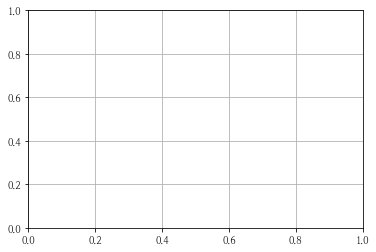

In [7]:
#a,b,c,lgbfit=boost_test
plt.figure()
lightgbm.plotting.plot_tree(model)
plt.show()

In [70]:
compare_data2=compare_data.drop(["place","date"],axis=1)
compare_ans2=compare_data2["사용량(kWh)"]
compare_data2=compare_data2.drop("사용량(kWh)",axis=1)
col_=compare_data2.columns.values
compare_ans2=compare_ans2.as_matrix()
compare_data2=compare_data2.as_matrix()
submission=submission_data.drop(["place","date","사용량(kWh)"],axis=1)

C:\Users\sprin\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
C:\Users\sprin\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


In [72]:
#xgb boost
XGB_WEIGHT=0.6500
BASELINE_WEIGHT=0.0056
BASELINE_PRED=0.0115

import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
import lightgbm as lgb

train_x=compare_data2
train_y=compare_ans2
test_x=submission

xgb_params={
    'objective': 'reg:linear',
    'metric': 'mae', #or 'l1'
    'is_unbalance': 'true',
    'boosting': 'gbtree',
    'num_leaves': 812,
    'min_data':400,
    'feature_fraction': 0.5,
    'bagging_fraction': 0.5,
    'bagging_freq': 20,
    'learning_rate': 0.02,
    'verbose': 0
}

#xgb_params={
#    'eta':0.05,
#    'max_depth':8,
#    'subsample':0.7,
#    'colsample_bytree':0.7,
#    'objective':'reg:linear',
#    'silent':1,
#    'seed':0
#}

#dtrain=xgb.DMatrix(train_x, train_y,feature_names=col_)
#dtest=xgb.DMatrix(test_x)

model=xgb.XGBRegressor(xgb_params)
print(train_x)
model.fit(train_x,train_y)

model=xgb.train(dict(xgb_params, silent=0),
                dtrain,
                num_boost_round=10000)
pred_= model.predict(dtest)



[[ -4.5   8.4 -15.3 ...  74.8   9.2  91.6]
 [  1.4  17.9 -10.8 ...  75.8  -4.4  76.6]
 [  4.3  14.2  -4.  ...  73.3   7.8  95.8]
 ...
 [  0.4  13.4 -10.5 ... 111.6  -8.3  99.9]
 [  6.2  20.1  -5.1 ...  89.9 -11.1 116.5]
 [ 17.2  30.7   2.2 ...  89.3  -5.7 116.8]]
[13:47:01] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBoostError: Invalid Parameter format for max_depth expect int but value='{'objective': 'regression', 'metric': 'mae', 'is_unbalance': 'true', 'boosting': 'gbdt', 'num_leaves': 812, 'min_data': 400, 'feature_fraction': 0.5, 'bagging_fraction': 0.5, 'bagging_freq': 20, 'learning_rate': 0.02, 'verbose': 0}'